## **AIRLINE DELAY PREDICTION**

Flight delays are a significant challenge in the aviation industry, affecting millions of passengers worldwide. Delays lead to financial losses for airlines, disrupt passengers' travel plans, and strain airport operations. Predicting flight delays ahead of time can help:

1. Improve Operational Efficiency: Airlines can proactively adjust schedules, allocate resources, and minimize disruptions.
2. Enhance Passenger Experience: Timely delay information allows passengers to make alternative plans and reduces frustration.
3. Optimize Airline Costs: Avoiding cascading delays saves costs associated with fuel, crew, and airport penalties.
4. Support Airport Management: Airports can use predictions to optimize gate assignments and manage traffic more effectively.

In a fast-paced world, predictive models based on historical data and advanced machine learning techniques offer a transformative approach to solving this recurring problem.

##### **INTRODUCTION**

This project focuses on predicting flight delays using historical flight data. By analyzing key factors such as departure times, flight lengths, airlines, and routes, the project aims to build a machine learning model that can classify whether a flight will be delayed or not. The outcome will help airlines and passengers make informed decisions.

   **Steps Involved:**
1. **Understanding the Problem:**

The goal is to classify flights as either delayed (1) or not delayed (0).
Identify key factors contributing to delays, such as time of departure, airline performance, and routes.

2. **Data Preprocessing:**

Handle missing data, encode categorical variables (e.g., airline names, airport codes), and scale numerical features.
Feature engineering to create new variables like time buckets, seasonality, and historical delay trends.

3. **Exploratory Data Analysis (EDA):**

Identify patterns and trends in the dataset.
Visualize delay distributions, delays by airline, and other important relationships using graphs.

4. **Model Selection:**

Train and evaluate multiple machine learning models, such as:
Random Forest
Logistic Regression
XGBoost
LightGBM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
df=pd.read_csv('Airlines.csv')

In [ ]:
# Check for null values
print(df.isnull().sum())

# Check data types
print(df.info())

# Describe numerical features
print(df.describe())



Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      539383 non-null  int64  
 1   Flight       539383 non-null  int64  
 2   AirportFrom  539383 non-null  int64  
 3   AirportTo    539383 non-null  int64  
 4   DayOfWeek    539383 non-null  int64  
 5   Time         539383 non-null  float64
 6   Length       539383 non-null  float64
 7   Delay        539383 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 32.9 MB
None
             Airline         Flight    AirportFrom      AirportTo  \
count  539383.000000  539383.000000  539383.000000  539383.000000   
mean        9.334527    2427.928630     144.116322     144.143162   
std         5.306368    2067.429837      79.3797

**Overview of Delay Distribution:**

1. The bar plot shows the distribution of flights categorized as either delayed (1) or not delayed (0).
There are more flights categorized as "No Delay" than those categorized as "Delayed."

2. A significant number of flights are not delayed, with the count exceeding 300,000.
Flights with delays are fewer, with the count around 200,000, indicating that delayed flights are less common.

<ipython-input-37-124e73671114>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delay', data=df, palette='viridis')


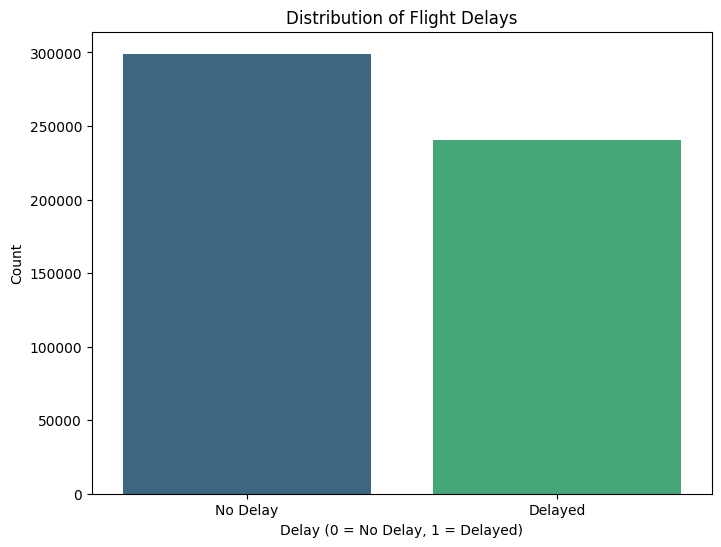

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Delay', data=df, palette='viridis')
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay (0 = No Delay, 1 = Delayed)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Delay', 'Delayed'])
plt.show()

**Inference from the Box Plot: Flight Length vs Delay**


1. **Overview of Flight Length Distribution:**
The box plot compares the distribution of flight lengths for flights that are not delayed (0) and delayed (1).
Both categories have similar median flight lengths, indicating that flight duration does not vary drastically between delayed and non-delayed flights.

2. **Spread of Flight Lengths**: The interquartile range (IQR) for both categories is almost identical, with most flight lengths concentrated within the same range.
The presence of outliers in both groups indicates a small number of exceptionally long flights.

3. **Notable Observations:** Delayed flights (1) have slightly more outliers with longer flight lengths compared to non-delayed flights.
While the average flight length is similar across both categories, the presence of longer flights might contribute to delays.
Impact on Analysis:

  Since flight length alone does not strongly differentiate delayed flights from non-delayed ones, this feature might have limited predictive power unless combined with other features (e.g., airline, time of day).
Further exploration is needed to determine if certain airlines or routes have longer flights that are more prone to delays.

<ipython-input-39-55508c22fa5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delay', y='Length', data=df, palette='coolwarm')


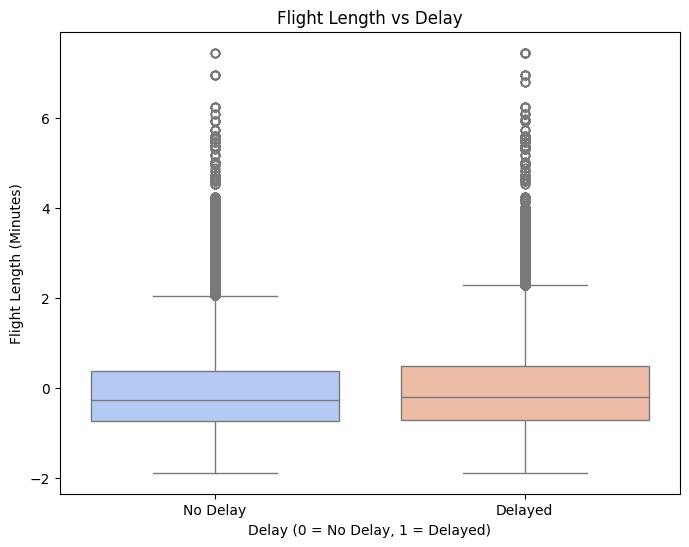

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Delay', y='Length', data=df, palette='coolwarm')
plt.title('Flight Length vs Delay')
plt.xlabel('Delay (0 = No Delay, 1 = Delayed)')
plt.ylabel('Flight Length (Minutes)')
plt.xticks([0, 1], ['No Delay', 'Delayed'])
plt.show()

**Inference from the Bar Plot: Delays by Airline**

1. Overview of Airline Delays: The bar plot shows the distribution of delayed (1) and non-delayed (0) flights across different airlines.
The count of delays varies significantly across airlines, indicating that some airlines experience more delays than others.

2. Airlines with High Delays: Airlines such as WN and DL have a relatively high count of delayed flights compared to others.
WN in particular has the highest overall flight count, with a significant proportion being delays.

3. Airlines with Low Delays: Airlines such as HA, FL, and MQ have fewer total flights, and the delays are relatively low.
These airlines may operate in regions or under conditions less prone to delays.

4. Comparison of Delayed vs Non-Delayed Flights: Some airlines, such as AA and DL, show a more balanced distribution of delays and non-delays.
For airlines like WN, non-delayed flights significantly outnumber delayed flights, but the absolute number of delays is still the highest.

5. Impact on Analysis: Airline appears to be a strong feature for predicting delays, as there is clear variation in delay counts across airlines.
Further investigation into airline-specific factors (e.g., routes, operational efficiency) could provide deeper insights into delay causes.


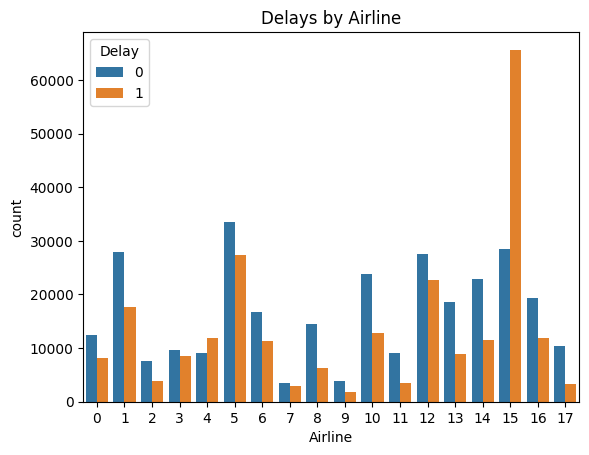

In [ ]:
# Analyze delays by Airline
sns.countplot(x='Airline', hue='Delay', data=df)
plt.title('Delays by Airline')
plt.show()



**Inference from the Box Plot: Delays by Time of Day**
1. **Overview of Time Distribution:**
The box plot compares the distribution of flight departure times for non-delayed (0) and delayed (1) flights.
The distributions are fairly similar, with the median departure times close to each other in both cases.

2. **Key Observations: Median Time:**
Both delayed and non-delayed flights tend to depart around the same time, approximately between 600 and 800 units (likely early morning to mid-morning).

3. **Spread:**
The interquartile range (IQR) is similar for both categories, suggesting that time of day has a consistent effect on both delayed and non-delayed flights.

4. **Outliers:**
There are some flights departing at unusual times (early or late), which could indicate operational or scheduling anomalies.

5. **Time of Day Influence**:There is no significant difference in flight delay patterns based on departure times. However, slight variations may exist during peak hours.
Delayed flights show slightly more variation in departure times, but the difference is not substantial.
6. **Impact on Modeling:** While time of day does not seem to be a strong standalone predictor of delays, combining it with other features like airline, route, or weather conditions may reveal more useful patterns.
Further segmentation of time into buckets (e.g., Morning, Afternoon, Evening) could provide additional insights.


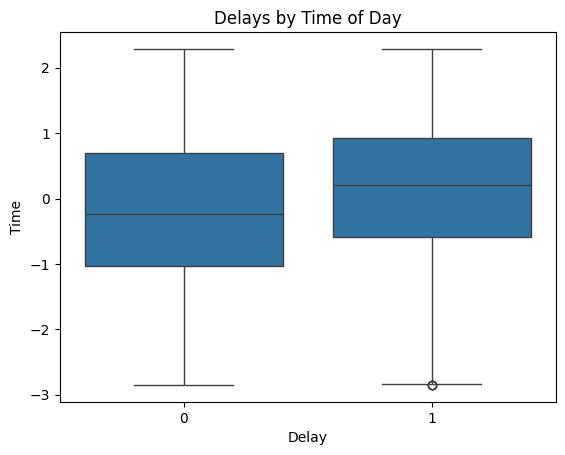

In [ ]:
# Analyze delays by Time of Day
sns.boxplot(x='Delay', y='Time', data=df)
plt.title('Delays by Time of Day')
plt.show()

### Encode Categorical Variables
- **Objective**: Convert categorical variables (`Airline`, `AirportFrom`, `AirportTo`) into numeric values so they can be used in machine learning models.
- **Implementation**:
  - Use `LabelEncoder` to assign a unique integer to each category in the columns.
  - Store the encoders in a dictionary (`label_encoders`) to inverse transform or reuse later.


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_cols = ['Airline', 'AirportFrom', 'AirportTo']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Standardize Numerical Features
- **Objective**: Scale numerical columns (`Time`, `Length`) to have a mean of 0 and a standard deviation of 1.
- **Why?**:
  - Standardization ensures all numerical features contribute equally to the model and avoids dominance of features with large values.
- **Implementation**:
  - Use `StandardScaler` from `sklearn` to standardize the numerical columns.


In [ ]:
scaler = StandardScaler()
df[['Time', 'Length']] = scaler.fit_transform(df[['Time', 'Length']])


### Drop Irrelevant Features
- **Objective**: Remove the `id` column if it exists, as it does not contain useful information for prediction.
- **Why?**:
  - Including non-informative columns like `id` can introduce noise and degrade the model's performance.
- **Implementation**:
  - Use `df.drop()` to remove the `id` column in-place.


In [ ]:
# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)


### Split Data into Features (`X`) and Target (`y`)
- **Objective**: Separate the dataset into independent variables (`X`) and the target variable (`y`).
- **Steps**:
  - `X`: All columns except the `Delay` column (target variable).
  - `y`: The `Delay` column, which represents whether a flight is delayed (`1`) or not delayed (`0`).


In [ ]:
# Split data into features and target
X = df.drop('Delay', axis=1)
y = df['Delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Initialize Random Forest Model
- **Objective**: Use a Random Forest Classifier for predicting flight delays.
- **Why Random Forest?**
  - Random Forest is a robust ensemble model that combines multiple decision trees to reduce overfitting and improve accuracy.
  - It is well-suited for handling structured data and works effectively with both classification and regression problems.
- **Implementation**:
  - Set `n_estimators=100`: This defines the number of decision trees in the forest.
  - Set `random_state=42`: Ensures reproducibility of the results.


In [ ]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Train the Model
- **Objective**: Fit the Random Forest Classifier to the training data.
- **Steps**:
  - Use the `fit()` method to train the model on `X_train` (features) and `y_train` (target).
  - The trained model will learn patterns and relationships in the data to predict delays effectively.


In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test)
rf_model.predict([[14,269,253,135,3,-2.833092,1.038237]])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

**Inference from Classification Report and Confusion Matrix**
1. **Classification Report**

*   **Precision**: For class 0 (No Delay), precision is 0.66, meaning 66% of flights predicted as "No Delay" are correctly classified.
For class 1 (Delay), precision is 0.58, indicating 58% of flights predicted as "Delayed" are correctly classified.
*   **Recall**: For class 0, recall is 0.67, meaning 67% of actual "No Delay" flights are correctly identified.
For class 1, recall is 0.56, meaning 56% of actual "Delayed" flights are correctly identified.

*  **F1-Score**: The F1-score is 0.66 for "No Delay" and 0.57 for "Delayed," showing slightly better performance for non-delayed flights.
The overall weighted F1-score is 0.62, indicating moderate performance.

*  **Accuracy**: The model's overall accuracy is 62%, meaning 62% of the predictions (both "No Delay" and "Delayed") are correct.

2. **Confusion Matrix**

* **True Positives (TP):** 26,875
  Flights correctly predicted as "Delayed."

* **True Negatives (TN):** 40,127
Flights correctly predicted as "No Delay."

* **False Positives (FP):** 19,752
Flights incorrectly predicted as "Delayed" when they were actually "No Delay."

* **False Negatives (FN):** 21,123
Flights incorrectly predicted as "No Delay" when they were actually "Delayed."



3. **Key Observations**
The model performs slightly better for identifying flights with "No Delay" (class 0) compared to "Delayed" flights (class 1).
A significant number of False Negatives (21,123) and False Positives (19,752) suggest room for improvement, especially in distinguishing between delayed and non-delayed flights.




              precision    recall  f1-score   support

           0       0.66      0.67      0.66     59879
           1       0.58      0.56      0.57     47998

    accuracy                           0.62    107877
   macro avg       0.62      0.62      0.62    107877
weighted avg       0.62      0.62      0.62    107877



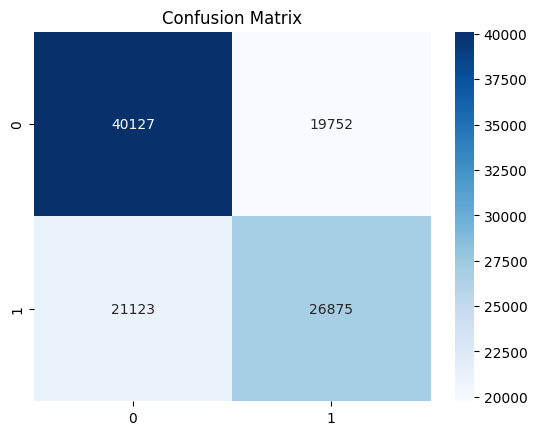

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


### Import Logistic Regression
- **Objective**: Use a Logistic Regression model for predicting flight delays.
- **Why Logistic Regression?**
  - It is a widely used baseline model for classification problems.
  - Logistic Regression predicts the probability of a binary outcome (e.g., "Delay" vs. "No Delay").
- **Implementation**:
  - `LogisticRegression` is imported from `sklearn.linear_model`.
  - `max_iter=500`: Specifies the maximum number of iterations for the solver to converge. Increasing it ensures convergence for larger datasets.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)

### Predict on Test Data
- **Objective**: Use the trained logistic regression model to predict flight delays for the test dataset.
- **Steps**:
  - Use the `predict()` method on `X_test` to generate predictions.
  - The output (`y_pred_log`) contains predicted classes (`0` for No Delay, `1` for Delay).


In [ ]:
log_model.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_model.predict(X_test)


**Inference from Classification Report and Confusion Matrix(Logistic Regression)**

1. **Classification Report**
* **Precision:**
Class 0 (No Delay): Precision is 0.60, meaning 60% of flights predicted as "No Delay" are correct.
Class 1 (Delay): Precision is 0.55, meaning 55% of flights predicted as "Delayed" are correct.

* **Recall:**
Class 0 (No Delay): Recall is 0.76, meaning 76% of actual "No Delay" flights are correctly identified.
Class 1 (Delay): Recall is 0.36, meaning only 36% of actual "Delayed" flights are correctly identified.

* **F1-Score:**
The F1-score for "No Delay" is 0.67, higher than for "Delayed," which is 0.44.
This indicates the model performs better at predicting non-delayed flights.

* **Accuracy:**
Overall accuracy is 59%, meaning the model correctly predicts the delay status for 59% of the flights.

* **Macro Average:**
The macro average F1-score is 0.55, showing balanced performance across both classes.

* **Weighted Average:**
The weighted F1-score is 0.57, accounting for the class imbalance in the dataset.


2. **Confusion Matrix**
* **True Positives (TP)**: 17,343
Flights correctly predicted as "Delayed."

* **True Negatives (TN):** 45,786
Flights correctly predicted as "No Delay."

* **False Positives (FP):** 14,093
Flights incorrectly predicted as "Delayed" but were actually "No Delay."

* **False Negatives (FN):** 30,655
Flights incorrectly predicted as "No Delay" but were actually "Delayed."


3. **Key Observations**
* The model performs significantly better for classifying "No Delay" flights (class 0) compared to "Delayed" flights (class 1).
* A high number of false negatives (30,655) indicates the model often fails to identify flights that are delayed, which can be problematic in real-world scenarios.
* The overall recall for delayed flights is low (0.36), suggesting the need for improvement in capturing true delays.

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.60      0.76      0.67     59879
           1       0.55      0.36      0.44     47998

    accuracy                           0.59    107877
   macro avg       0.58      0.56      0.55    107877
weighted avg       0.58      0.59      0.57    107877



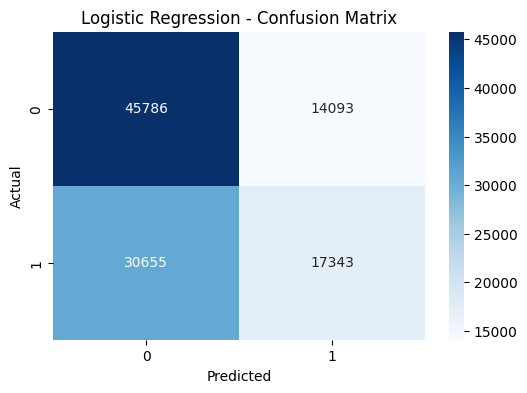

In [ ]:
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. **Classification Report**
* **Precision**:
Class 0 (No Delay): Precision is 0.64, meaning 64% of flights predicted as "No Delay" are correct.
Class 1 (Delay): Precision is 0.67, meaning 67% of flights predicted as "Delayed" are correct.

* **Recall**:
Class 0 (No Delay): Recall is 0.84, meaning 84% of actual "No Delay" flights are correctly identified.
Class 1 (Delay): Recall is 0.41, meaning 41% of actual "Delayed" flights are correctly identified.

* **F1-Score**:
Class 0 (No Delay): F1-score is 0.73, showing better performance in identifying non-delayed flights.
Class 1 (Delay): F1-score is 0.51, indicating moderate performance in predicting delays.

* **Accuracy:**
The overall accuracy is 65%, meaning the model correctly predicts delay status for 65% of the flights.

* **Macro Average:**
The macro average F1-score is 0.62, indicating balanced performance across both classes.

* **Weighted Average:**
The weighted F1-score is 0.63, accounting for the imbalance in the dataset.

2. **Confusion Matrix**
* **True Positives (TP):** 19,551
Flights correctly predicted as "Delayed."

* **True Negatives (TN):** 50,428
Flights correctly predicted as "No Delay."

* **False Positives (FP):** 9,451
Flights incorrectly predicted as "Delayed" but were actually "No Delay."

* **False Negatives (FN):** 28,447
Flights incorrectly predicted as "No Delay" but were actually "Delayed."

3. **Key Observations**
* The model performs well for classifying "No Delay" flights (class 0) with high recall (0.84) and a strong F1-score (0.73).
* However, it struggles to identify delayed flights (class 1) with lower recall (0.41) and a moderate F1-score (0.51).
* False Negatives (28,447) remain a significant challenge, indicating the model often misses predicting actual delays.


Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     59879
           1       0.67      0.41      0.51     47998

    accuracy                           0.65    107877
   macro avg       0.66      0.62      0.62    107877
weighted avg       0.65      0.65      0.63    107877



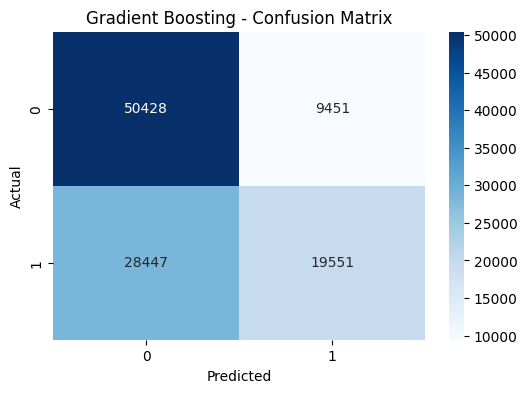

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Classification Report
print("Gradient Boosting - Classification Report")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1. **Classification Report**
* **Precision:**
Class 0 (No Delay): Precision is 0.67, meaning 67% of flights predicted as "No Delay" are correct.
Class 1 (Delay): Precision is 0.66, meaning 66% of flights predicted as "Delayed" are correct.

* **Recall:**
Class 0 (No Delay): Recall is 0.80, meaning 80% of actual "No Delay" flights are correctly identified.
Class 1 (Delay): Recall is 0.50, meaning 50% of actual "Delayed" flights are correctly identified.

* **F1-Score:**
Class 0 (No Delay): F1-score is 0.73, showing strong performance in identifying non-delayed flights.
Class 1 (Delay): F1-score is 0.57, indicating moderate performance for predicting delays.

* **Accuracy:**
The overall accuracy is 67%, meaning the model correctly predicts the delay status for 67% of flights.

* **Macro Average:**
The macro average F1-score is 0.65, indicating balanced performance across both classes.

* **Weighted Average:**
The weighted F1-score is 0.66, accounting for the imbalance in the dataset.

2. **Confusion Matrix**
* **True Positives (TP):** 24,151
Flights correctly predicted as "Delayed."

* **True Negatives (TN):** 47,675
Flights correctly predicted as "No Delay."

* **False Positives (FP):** 12,204
Flights incorrectly predicted as "Delayed" but were actually "No Delay."

* **False Negatives (FN):** 23,847
Flights incorrectly predicted as "No Delay" but were actually "Delayed."


3. **Key Observations**
* Class 0 (No Delay):
High recall (0.80) and F1-score (0.73) indicate that the model performs well in identifying non-delayed flights.

* Class 1 (Delay):
Recall for delayed flights is moderate (0.50), meaning half of the actual delays are identified correctly.
The model still struggles with false negatives (23,847), where delayed flights are classified as non-delayed.

* Overall Performance:
XGBoost achieves the highest accuracy (67%) among the models tested so far, with relatively balanced precision and recall across both classes.



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:16:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.67      0.80      0.73     59879
           1       0.66      0.50      0.57     47998

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877



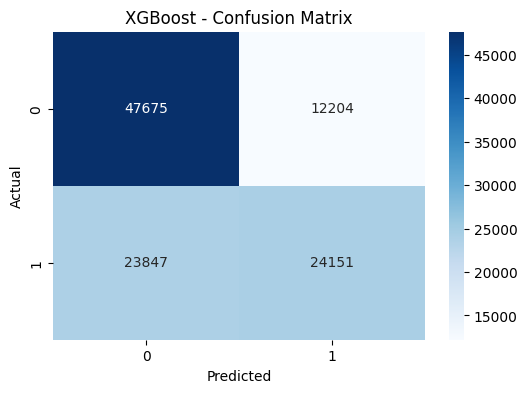

In [ ]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report
print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **CONCLUSION:**

1. **Comparison of Models**
* **Logistic Regression:**

1. Accuracy: 59%
2. Precision (Class 1 - Delayed): 0.55
3. Recall (Class 1 - Delayed): 0.36
4. F1-Score (Class 1 - Delayed): 0.44
5. Key Observation: Baseline model with limited ability to identify delayed flights effectively.


* **Gradient Boosting:**

1. Accuracy: 65%
2. Precision (Class 1 - Delayed): 0.67
3. Recall (Class 1 - Delayed): 0.41
4. F1-Score (Class 1 - Delayed): 0.51
5. Key Observation: Improved accuracy over Logistic Regression, but still moderate recall for delays.

* **XGBoost:**

1. Accuracy: 67%
2. Precision (Class 1 - Delayed): 0.66
3. Recall (Class 1 - Delayed): 0.50
4. F1-Score (Class 1 - Delayed): 0.57
5. Key Observation: Best performance overall, with the highest accuracy and relatively balanced precision and recall.

* **Best Model: XGBoost**

  Why?
Highest accuracy (67%).
Balanced precision and recall for both delayed and non-delayed flights.
Robust performance compared to other models.

2. **Why is Accuracy Low?**
* Class Imbalance:
The dataset is imbalanced, with more "No Delay" flights compared to "Delayed" flights. This causes models to perform better for the majority class (No Delay) while struggling with the minority class (Delay).

* Limited Features:
The dataset includes only basic features like airline, airport, flight length, and time. Other critical factors influencing delays, such as:
Weather conditions (e.g., storms, snow).
Airport traffic (e.g., congestion at departure/arrival airports).
Day of the week or seasonal trends. These features, if included, could significantly improve predictive performance.

* Complexity of Delays:
Flight delays are influenced by a mix of operational, environmental, and regulatory factors that are not fully captured in the available data.
False Negatives:

* A considerable number of false negatives (actual delayed flights predicted as non-delayed) lowers the model's overall recall and F1-score for delayed flights.

3. **Future Scope**
* **Feature Engineering:**
Incorporate additional features such as:
1. Weather data: Rain, snow, wind, or thunderstorms at departure and arrival airports.
2. Airport traffic data: Real-time or historical congestion levels.
Seasonal effects: Holidays and peak travel times.

* **Data Collection:**
1. Gather external datasets (e.g., FAA reports, real-time traffic data) to capture a more comprehensive view of delay causes.

* **Model Optimization:**
1. Perform advanced hyperparameter tuning using techniques like Grid Search or Bayesian Optimization for XGBoost or Gradient Boosting.
2. Experiment with ensemble methods or stacking models to combine the strengths of multiple algorithms.

* **Class Imbalance Handling:**

 Use techniques such as:
 1. **SMOTE**: Oversample the minority class (delays).
 2. **Class weighting**: Penalize misclassification of delays during model training.
Threshold Adjustment:

  Adjust the classification threshold for delayed flights to reduce false negatives, especially if the goal is to prioritize identifying delays.

* **Real-Time Deployment:**

 Deploy the model for real-time predictions using APIs or web applications.
Integrate the model with flight management systems to provide actionable insights for airlines and passengers.